In [1]:
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T

from clipdetect.detect import CLIPDetect
from clipdetect.utils import plot_detection, plot_importance_map, create_patches

/home/eduardo/anaconda3/envs/clip-detect/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
img2lbl1 = torch.arange(1,4, dtype=torch.float).reshape(3, 1).repeat(1, 3)
img2lbl2 = torch.arange(4,7, dtype=torch.float).reshape(3, 1).repeat(1, 3)
torch.stack([img2lbl1, img2lbl2], dim=0).unsqueeze(0).shape

torch.Size([1, 2, 3, 3])

In [46]:
torch.allclose(img2lbl1, img2lbl2)

False

In [42]:
img2lbl2.mean()

tensor(5.)

In [2]:
patch_h = 23
patch_w = 31
model_id = "openai/clip-vit-base-patch32"
window_size = 3

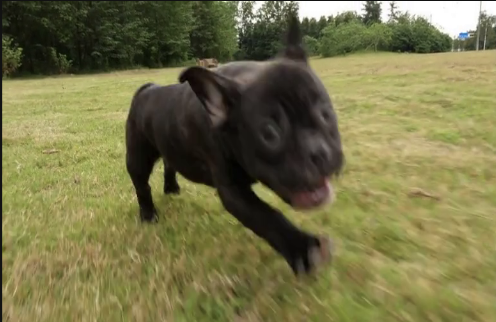

In [3]:
label = "a picture of a dog"
image = Image.open("assets/dog.png").convert("RGB")
image

In [11]:
image_tensor = T.ToTensor()(image).unsqueeze(0)
patches = create_patches(image_tensor, patch_h, patch_w)

In [5]:
model = CLIPDetect(model_id, patch_h, patch_w, window_size)

CPU available


In [6]:
output = model([label], [image])

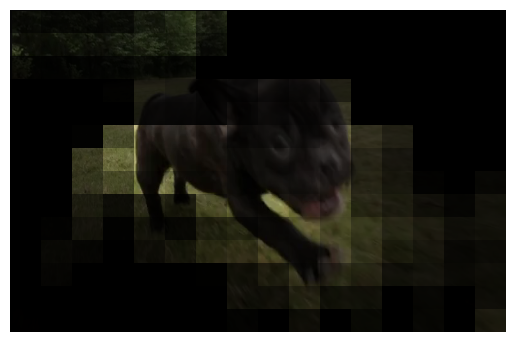

In [12]:
plot_importance_map(patches, output.importance_map)

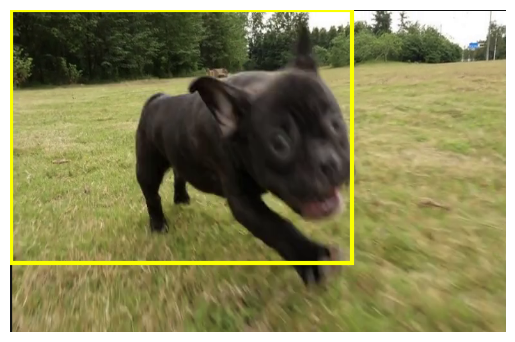

In [13]:
plot_detection(image, output.bbox)